# Harmony PI 20.3 Demo

This notebook provides condensed examples of using Harmony to perform specific features that were built for PI 20.3.  For more a general introduction and tutorial, see [Harmony API Introduction](./Harmony%20Api%20Introduction.ipynb).  Useful helpers for making the calls found in this note book can be found under the [docs/notebook-helpers](./notebook-helpers) folder

## Prerequisites

1. Install Python 3.  This notebook is tested to work in 3.8 but should work in most recent 3.x versions.
2. Install Jupyter: `pip install jupyterlab`
3. Setup your `~/.netrc` for Earthdata Login as described in [Harmony API Introduction](./Harmony%20Api%20Introduction.ipynb)
4. Run the following cell to install Python dependencies, import necessary modules, and set notebook defaults

In [1]:
# If in /team_demos back up a directory in order to install notebook_helpers/requirements.txt
%cd .. 

/Users/asteiker/Desktop/Harmony/harmony/docs


In [2]:
%load_ext autoreload
%autoreload
%matplotlib inline

import sys
# Install dependencies into the Jupyter Kernel
!{sys.executable} -m pip install -q -r notebook_helpers/requirements.txt

# Import libraries used throughout the notebook
from notebook_helpers import get, post, show, get_data_urls, show_async, show_async_condensed, print_async_status, show_shape

## ASF Data Transformations in Harmony's Production Environment

ASF's Sentinel-1 Interferograms (BETA) product is wired up to Harmony's new production environment.

In [3]:
asf_collection = 'C1595422627-ASF'
coverages_root = 'https://harmony.earthdata.nasa.gov/{collection}/ogc-api-coverages/1.0.0/collections/{variable}/coverage/rangeset'

### Variable and spatial subsetting with projecting, reformtatting output to PNG and spatial constraints
Each parent NetCDF is approx. 60 MB and the subsetted pngs and geotiffs are well under 1 MB each.

In [4]:
response = get(
    coverages_root.format(
        collection=asf_collection, 
        variable='%2Fscience%2Fgrids%2Fdata%2Fcoherence'), 
    params={
       # 'granuleID': ['G1715962900-ASF', 'G1715965586-ASF'],
        'format': 'image/png',
        'outputcrs': 'EPSG:2230',
        'subset': [
            'lon(-115.5:-115.25)', 
            'lat(33:33.1)',
             'time("2020-03-12T00:00:00Z":"2020-03-13T03:00:00Z")'
            ]})

GET /C1595422627-ASF/ogc-api-coverages/1.0.0/collections/%2Fscience%2Fgrids%2Fdata%2Fcoherence/coverage/rangeset?format=image%2Fpng&outputcrs=EPSG%3A2230&subset=lon%28-115.5%3A-115.25%29&subset=lat%2833%3A33.1%29&subset=time%28%222020-03-12T00%3A00%3A00Z%22%3A%222020-03-13T03%3A00%3A00Z%22%29


### Response includes STAC catalog...

Async response at 08:34:15
{
  "username": "amy.steiker",
  "status": "running",
  "message": "The job is being processed",
  "progress": 0,
  "createdAt": "2020-09-21T14:34:12.966Z",
  "updatedAt": "2020-09-21T14:34:12.966Z",
  "links": [
    {
      "title": "Job Status",
      "href": "https://harmony.earthdata.nasa.gov/jobs/66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb",
      "rel": "self",
      "type": "application/json"
    }
  ],
  "request": "https://harmony.earthdata.nasa.gov/C1595422627-ASF/ogc-api-coverages/1.0.0/collections/%2Fscience%2Fgrids%2Fdata%2Fcoherence/coverage/rangeset?format=image%2Fpng&outputcrs=EPSG%3A2230&subset=lon(-115.5%3A-115.25)&subset=lat(33%3A33.1)&subset=time(%222020-03-12T00%3A00%3A00Z%22%3A%222020-03-13T03%3A00%3A00Z%22)",
  "jobID": "66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb"
}
Waiting for updates...
Async response at 08:34:18
{
  "username": "amy.steiker",
  "status": "running",
  "message": "The job is being processed",
  "progress": 50,
  "createdAt": "2020-

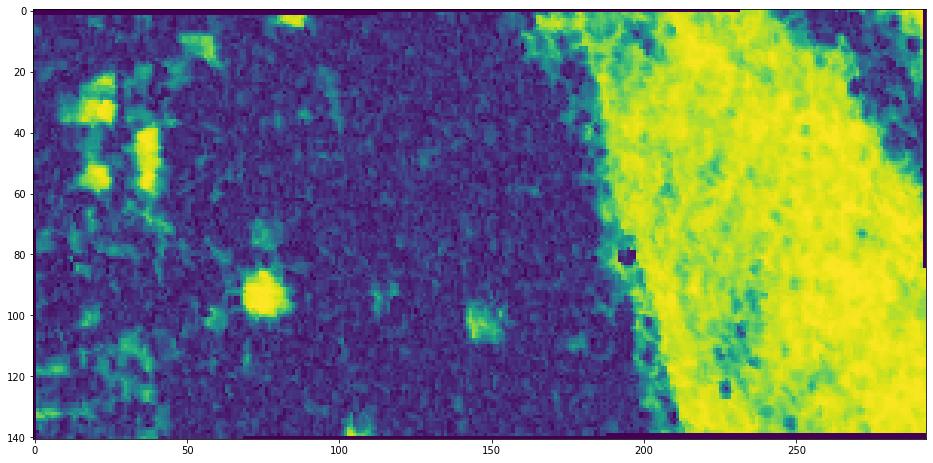

Waiting for updates...
Async response at 08:34:23
{
  "username": "amy.steiker",
  "status": "successful",
  "message": "The job has completed successfully",
  "progress": 100,
  "createdAt": "2020-09-21T14:34:12.966Z",
  "updatedAt": "2020-09-21T14:34:22.269Z",
  "links": [
    {
      "title": "Job Status",
      "href": "https://harmony.earthdata.nasa.gov/jobs/66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb",
      "rel": "self",
      "type": "application/json"
    },
    {
      "title": "STAC catalog",
      "href": "https://harmony.earthdata.nasa.gov/stac/66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb/",
      "rel": "stac-catalog-json",
      "type": "application/json"
    },
    {
      "href": "https://harmony.earthdata.nasa.gov/service-results/harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png",
      "title": "G1715962900-ASF",
      "type":

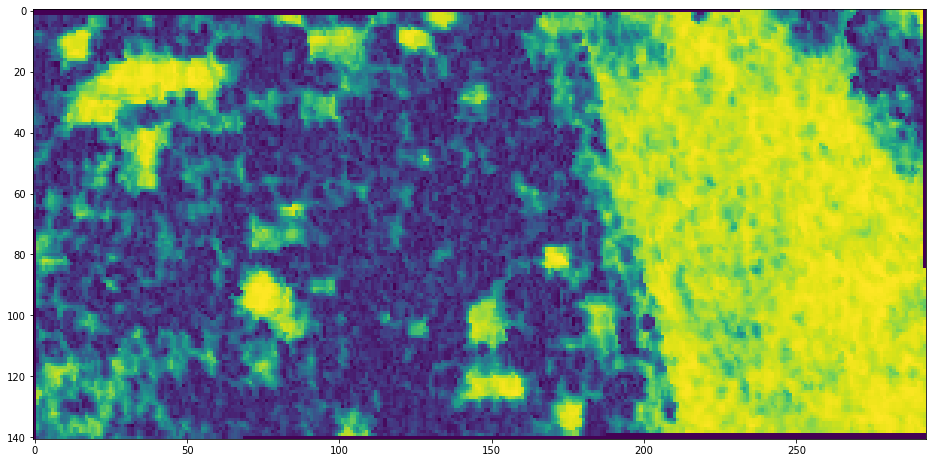

Async request is complete


<Response [200]>

In [5]:
show_async(response)

### store job ID to create stac location

In [15]:
import json

In [21]:
results = json.loads(response.content)
job = results['jobID']
print(job)

stac_root = 'https://harmony.earthdata.nasa.gov/stac/{jobID}/'

66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb


## Open STAC Catalog using `intake-stac`

Using http://gallery.pangeo.io/repos/pangeo-data/pangeo-tutorial-gallery/intake.html for guidance...


In [6]:
# Install dependencies into the Jupyter Kernel
!{sys.executable} -m pip install intake-stac

In [7]:
import intake

In [23]:
stac_cat = intake.open_stac_catalog(stac_root.format(jobID=job),name='Harmony output')
display(list(stac_cat))

['66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb_0',
 '66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb_1']

In [33]:
stac_item_0 = list(stac_cat)[0]
print(stac_cat[stac_item_0])

name: 66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb_0
container: catalog
plugin: ['stac_item']
description: 
direct_access: True
user_parameters: []
metadata: 
args: 
  stac_obj: 66dbf29b-ea6b-4be7-a7b0-3ea8809eb1cb_0


In [34]:
for id, entry in stac_cat.search('type').items():
    display(entry)

name: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
container: xarray
plugin: ['xarray_image']
description: G1715962900-ASF
direct_access: True
user_parameters: []
metadata: 
  href: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  title: G1715962900-ASF
  type: image/png
  roles: ['overview']
args: 
  urlpath: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  chunks: 

name: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200301-014119-34455N_32574N-PP-5234-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
container: xarray
plugin: ['xarray_image']
description: G1715965586-ASF
direct_access: True
user_parameters: []
metadata: 
  href: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200301-014119-34455N_32574N-PP-5234-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  title: G1715965586-ASF
  type: image/png
  roles: ['overview']
args: 
  urlpath: s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200301-014119-34455N_32574N-PP-5234-v2_0_2__science_grids_data_coherence_regridded_subsetted.png
  chunks: 

## Access Harmony outputs directly from STAC 

In [35]:
da = stac_cat[stac_item_0]['s3://harmony-prod-staging/public/harmony/gdal/0588ec0f-29e4-49b5-a8d7-ff6a889a20e9/S1-GUNW-A-R-166-tops-20200313_20200206-014119-34455N_32574N-PP-1749-v2_0_2__science_grids_data_coherence_regridded_subsetted.png'].to_dask()
da

NoCredentialsError: Unable to locate credentials

(taken from Zarr notebook... Do we need to do something similar for STAC access??)

## Set Up AWS

Now that you have Zarr links, you can access them with your AWS credentials to the Harmony account.  Obtain the credentials and make sure your default AWS account uses them.  One way to do this is to edit `~/.aws/credentials` to have the following section:
```
[default]
aws_access_key_id = YOUR_HARMONY_ACCESS_KEY_ID
aws_secret_access_key = YOUR_HARMONY_SECRET_ACCESS_KEY
```
Restart your Jupyter kernel after completing this step